# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [26]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [27]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]
x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

In [28]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [29]:
x_train[0],y_train[0]

(array([0.  , 0.  , 0.  , 0.07]), 1.68)

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

- This problem is an example of multi linear regression. 
-  Our goal is to find the best fit line from a scatter of data. The labels(output) depends on multiple features(input). 
- So, we should find an optimum number also called a weight for each feature so that the model can predict accurately. 
- We first define a method called `Gradient Descent` which calculates the loss and tweaks the model accordingly
- As the epochs(iterations)increase, the cost decreases and our model gets closer and closer to the best fit line.
- Using the defined function `Gradient Descent` we calculate weight and bias.
- we use our testing data and the calculated values of weights and bias to calculate values of predicted_y



2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [30]:
# implement Linear Regression
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        # if (epoch%(epochs/10)==0):
        #     print("Cost is:",cost)
        
    return w, b, cost_list

In [31]:
def predict(X, w, b):
    return X.dot(w) + b
# y_pred = predict(x_test, w, b)

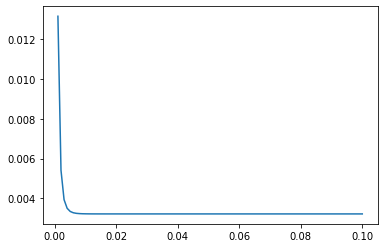

In [32]:
learning_rate=[0.001+i*(0.001) for i in range(100)]
lr_rmse=[]
lr_predictions=[]
for i in learning_rate:
  w, b, c= GradientDescent(x_train, y_train, np.zeros(x_train.shape[1]), 0, i,epochs=15000)
  p=predict(x_test, w, b)
  lr_predictions.append(p)
  rmse=mean_squared_error(y_test,p)
  lr_rmse.append(rmse)
plt.plot(learning_rate,lr_rmse)

In [33]:
table_data=[i for i in zip(learning_rate,lr_rmse)]
print(tabulate(table_data,headers=["learning_rate","RMSE"],tablefmt='grid'))


+-----------------+------------+
|   learning_rate |       RMSE |
+=================+============+
|           0.001 | 0.013144   |
+-----------------+------------+
|           0.002 | 0.0054102  |
+-----------------+------------+
|           0.003 | 0.00393318 |
+-----------------+------------+
|           0.004 | 0.00350167 |
+-----------------+------------+
|           0.005 | 0.00334282 |
+-----------------+------------+
|           0.006 | 0.00327731 |
+-----------------+------------+
|           0.007 | 0.00324819 |
+-----------------+------------+
|           0.008 | 0.00323435 |
+-----------------+------------+
|           0.009 | 0.00322737 |
+-----------------+------------+
|           0.01  | 0.00322367 |
+-----------------+------------+
|           0.011 | 0.00322163 |
+-----------------+------------+
|           0.012 | 0.00322049 |
+-----------------+------------+
|           0.013 | 0.00321983 |
+-----------------+------------+
|           0.014 | 0.00321945 |
+---------

In [34]:
min_lr_rmse=min(lr_rmse)
print("Minimum RMSE is :",min_lr_rmse,end=" ")
index_min_lr=lr_rmse.index(min_lr_rmse)
print("at learning rate of ",learning_rate[index_min_lr])
y_pred=lr_predictions[index_min_lr]

Minimum RMSE is : 0.003218913371238692 at learning rate of  0.1


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

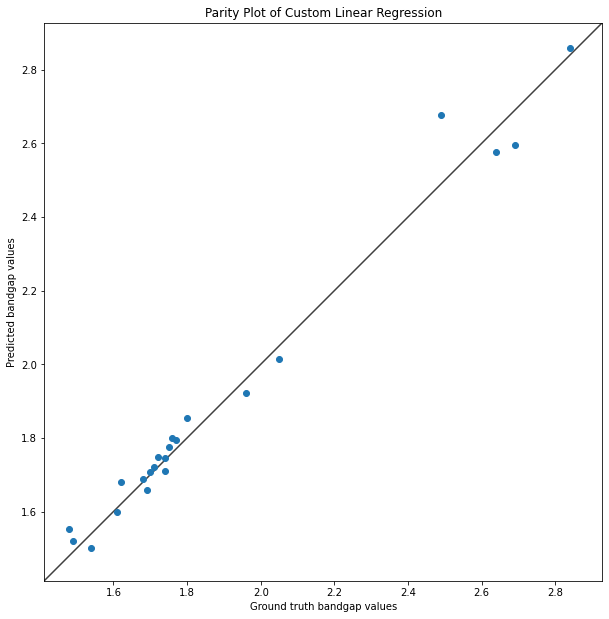

In [35]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

- Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. 
- This method performs L2 regularization. 
- When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

<!-- Your answer to 1.2.1 -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

 - Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. 
 - Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values ranging from 0 to infinite.
 - The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.


In [36]:
# you should not have imported sklearn before this point
import sklearn
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
initial_alpha=1.0
alpha_values=[1.0+i*(0.05) for i in range(20)]
predictions_ridge=[]
for a in alpha_values:
  clf = Ridge(alpha=a)
  clf.fit(x_train, y_train)
  prediction=clf.predict(x_test)
  predictions_ridge.append(prediction)

In [37]:
rmse_values=[]
for prediction in predictions_ridge:
  rmse=mean_squared_error(y_test, prediction)
  rmse_values.append(rmse)

In [38]:
from tabulate import tabulate
table_data=[i for i in zip(alpha_values,rmse_values)]
print(tabulate(table_data,headers=["Alpha","RMSE"],tablefmt='grid'))

+---------+------------+
|   Alpha |       RMSE |
+=========+============+
|    1    | 0.00727152 |
+---------+------------+
|    1.05 | 0.00756775 |
+---------+------------+
|    1.1  | 0.0078685  |
+---------+------------+
|    1.15 | 0.00817338 |
+---------+------------+
|    1.2  | 0.00848204 |
+---------+------------+
|    1.25 | 0.00879414 |
+---------+------------+
|    1.3  | 0.00910935 |
+---------+------------+
|    1.35 | 0.00942739 |
+---------+------------+
|    1.4  | 0.00974798 |
+---------+------------+
|    1.45 | 0.0100709  |
+---------+------------+
|    1.5  | 0.0103958  |
+---------+------------+
|    1.55 | 0.0107225  |
+---------+------------+
|    1.6  | 0.0110509  |
+---------+------------+
|    1.65 | 0.0113806  |
+---------+------------+
|    1.7  | 0.0117116  |
+---------+------------+
|    1.75 | 0.0120436  |
+---------+------------+
|    1.8  | 0.0123765  |
+---------+------------+
|    1.85 | 0.0127101  |
+---------+------------+
|    1.9  | 0.0130443  |


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

**Lasso** stands for **Least absolute and Selection Operator**. It is another type of regularization technique used to reduce the complexity of the model. It is similar to ridge regression except that the penalty term includes the absolute weight instead of the square of weights.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

- Lasso regression perform L1 regularization i.e, adds penalty equivalent to absolute value of the magnitude of coefficients
- Lasso regression tends to make coefficients to absolute zero. 
- When alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero then it converges to a minimum mse.
- For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression 
- Many of the coefficients are zero even for very small values of alpha

### Implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [39]:
alpha_values=[.0001+i*(.0001) for i in range(20)]
predictions_lasso=[]
rmse_lasso=[]
for alpha in alpha_values:
  clf = Lasso(alpha=alpha)
  clf.fit(x_train,y_train)
  prediction=clf.predict(x_test)
  predictions_lasso.append(prediction)
  rmse=mean_squared_error(y_test, prediction)
  rmse_lasso.append(rmse)
table_data=[i for i in zip(alpha_values,rmse_lasso)]
print(tabulate(table_data,headers=["Alpha","RMSE"],tablefmt='grid'))

+---------+------------+
|   Alpha |       RMSE |
+=========+============+
|  0.0001 | 0.00324226 |
+---------+------------+
|  0.0002 | 0.0032667  |
+---------+------------+
|  0.0003 | 0.00329204 |
+---------+------------+
|  0.0004 | 0.00331829 |
+---------+------------+
|  0.0005 | 0.00334543 |
+---------+------------+
|  0.0006 | 0.00337349 |
+---------+------------+
|  0.0007 | 0.00339806 |
+---------+------------+
|  0.0008 | 0.00340594 |
+---------+------------+
|  0.0009 | 0.00341425 |
+---------+------------+
|  0.001  | 0.003423   |
+---------+------------+
|  0.0011 | 0.00343219 |
+---------+------------+
|  0.0012 | 0.0034418  |
+---------+------------+
|  0.0013 | 0.00345185 |
+---------+------------+
|  0.0014 | 0.00346233 |
+---------+------------+
|  0.0015 | 0.00347325 |
+---------+------------+
|  0.0016 | 0.0034846  |
+---------+------------+
|  0.0017 | 0.00349638 |
+---------+------------+
|  0.0018 | 0.00350859 |
+---------+------------+
|  0.0019 | 0.00352123 |
